# Cleaning data from transfermarkt

## We are cleaning the data of 25 leagues across the globe and assesing nearly a million transfers.

First, the imports:

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [51]:
%%R

require('tidyverse')
library(scales)

R[write to console]: 
Attaching package: ‘scales’


R[write to console]: The following object is masked from ‘package:purrr’:

    discard


R[write to console]: The following object is masked from ‘package:readr’:

    col_factor




### Merging all the dataframes into one big DF. 

In [4]:
bundesliga_df = pd.read_csv('data/1-bundesliga.csv')
championship_df = pd.read_csv('data/championship.csv')
laliga_df = pd.read_csv('data/primera-division.csv')
ligue1_df = pd.read_csv('data/ligue-1.csv')
seriea_df = pd.read_csv('data/serie-a.csv')
liganos_df = pd.read_csv('data/liga-nos.csv')
eredivisie_df = pd.read_csv('data/eredivisie.csv')
russian_league_df = pd.read_csv('data/premier-liga.csv')
prem_df = pd.read_csv('data/premier-league.csv')
brazil_df = pd.read_csv('data/campeonato-brasileiro-serie-a.csv')
china_df = pd.read_csv('data/chinese-super-league.csv')
japan_df = pd.read_csv('data/j1-league.csv')
sweden_df = pd.read_csv('data/allsvenskan.csv')
turkey_df = pd.read_csv('data/super-lig.csv')
usa_df = pd.read_csv('data/major-league-soccer.csv')
mexico_df = pd.read_csv('data/liga-mx-apertura.csv')
saudi_df = pd.read_csv('data/saudi-professional-league.csv')
scot_df = pd.read_csv('data/scottish-premiership.csv')
norway_df = pd.read_csv('data/eliteserien.csv')
austria_df = pd.read_csv('data/bundesliga.csv')
belgium_df = pd.read_csv('data/juliper-pro-league.csv')
korean_df = pd.read_csv('data/k-league-1.csv')
denmark_df = pd.read_csv('data/superligaen.csv')
argentina_df = pd.read_csv('data/superliga.csv')

In [5]:
df = pd.concat([argentina_df, denmark_df, korean_df, belgium_df, austria_df, norway_df, scot_df, mexico_df, saudi_df, sweden_df, usa_df, turkey_df, china_df, japan_df, prem_df, bundesliga_df, brazil_df, championship_df, laliga_df, ligue1_df, seriea_df, liganos_df, eredivisie_df, russian_league_df], ignore_index=True)
df.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country
0,Club Atlético Aldosivi,César Carranza,33.0,Centre-Forward,Club Ferro Carril Oeste,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina
1,Club Atlético Aldosivi,Gonzalo Bozzoni,24.0,Left-Back,Club Atlético Atlanta,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina
2,Club Atlético Aldosivi,Matías Lequi,33.0,Centre-Back,Sportivo Luqueño,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina
3,Club Atlético Aldosivi,Alejandro Capurro,33.0,Central Midfield,Club de Gimnasia y Esgrima La Plata,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina
4,Club Atlético Aldosivi,Darío Gandín,30.0,Centre-Forward,CA Colon,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina


In [27]:
df_in = df[df['transfer_movement'] == 'in']
df_in.head()


,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country
0,Club Atlético Aldosivi,César Carranza,33.0,Centre-Forward,Club Ferro Carril Oeste,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina
1,Club Atlético Aldosivi,Gonzalo Bozzoni,24.0,Left-Back,Club Atlético Atlanta,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina
2,Club Atlético Aldosivi,Matías Lequi,33.0,Centre-Back,Sportivo Luqueño,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina
3,Club Atlético Aldosivi,Alejandro Capurro,33.0,Central Midfield,Club de Gimnasia y Esgrima La Plata,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina
4,Club Atlético Aldosivi,Darío Gandín,30.0,Centre-Forward,CA Colon,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina


In [28]:
len(df_in)


189118

In [32]:
#sum the fee_cleaned for every league_name and every year
league = df_in.groupby(['league_name', 'year']).sum('fee_cleaned').reset_index()
#remove age column
league = league.drop(['age'], axis=1)
league.head()


,league_name,year,fee_cleaned
0,1 Bundesliga,1992,29.395
1,1 Bundesliga,1993,37.889
2,1 Bundesliga,1994,54.262
3,1 Bundesliga,1995,78.113
4,1 Bundesliga,1996,51.239


In [33]:
#show me unique league_names
league['league_name'].unique()

array(['1 Bundesliga', 'Allsvenskan', 'Bundesliga',
       'Campeonato Brasileiro Serie A', 'Championship',
       'Chinese Super League', 'Eliteserien', 'Eredivisie', 'J1 League',
       'Juliper Pro League', 'K League 1', 'Liga Mx Apertura', 'Liga Nos',
       'Ligue 1', 'Major League Soccer', 'Premier League', 'Premier Liga',
       'Primera Division', 'Saudi Professional League',
       'Scottish Premiership', 'Serie A', 'Super Lig', 'Superliga',
       'Superligaen'], dtype=object)

In [36]:
#only keep Premier League, Bundesliga, 'Primera Division, Ligue 1, Serie A
euro_league = league[league['league_name'].isin(['Premier League', '1 Bundesliga', 'Primera Division', 'Ligue 1', 'Serie A'])]

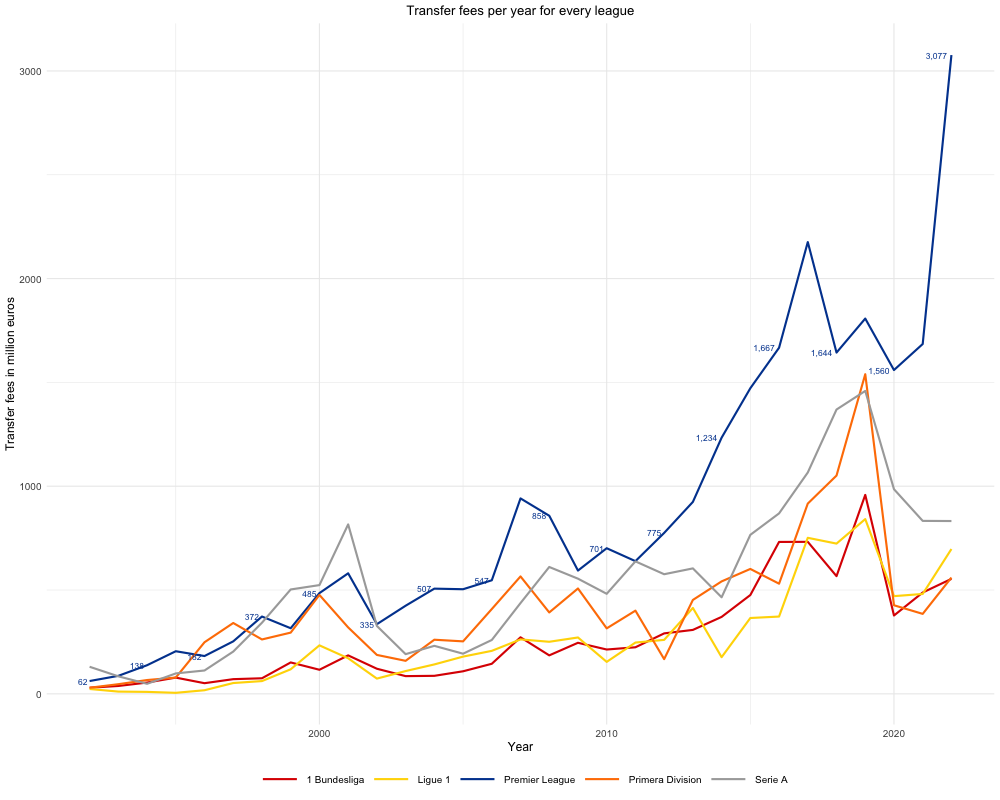

In [53]:
%%R -i euro_league -w 1000 -h 800 
library(ggplot2)
library(scales)

# Set color palette
colors <- c("#00449E", "#DD0000", "#FF7F00", "#FFD700", "#A9A9A9")
names(colors) <- c("Premier League", "1 Bundesliga", "Primera Division", "Ligue 1", "Serie A")

# Plot with highlighted Premier League and colored lines for other leagues
ggplot(euro_league, aes(x = year, y = fee_cleaned, group = league_name, color = league_name)) +
  geom_line(size = 1) +
  scale_color_manual(values = colors) +
  labs(title = "Transfer fees per year for every league", x = "Year", y = "Transfer fees in million euros") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5),
        legend.position = "bottom",
        legend.title = element_blank(),
        legend.key.width = unit(1.5, "cm"),
        legend.key.height = unit(0.7, "cm"),
        legend.text = element_text(size = 10),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10)) +
  geom_text(data = subset(euro_league, league_name == "Premier League" & year %% 2 == 0),
            aes(label = comma(fee_cleaned), color = league_name),
            hjust = 1.2, vjust = 0.5, size = 3, show.legend = FALSE)


In [43]:
#for prem_2 remove the rows where transfer_movement is in


In [103]:

prem_2.groupby('club_name')['fee_cleaned'].sum().sort_values(ascending=False).reset_index()


,club_name,fee_cleaned
0,Chelsea FC,1490.990
1,Manchester City,1025.710
2,Manchester United,984.980
3,Arsenal FC,839.560
4,Liverpool FC,674.600
5,Tottenham Hotspur,655.800
6,Wolverhampton Wanderers,647.365
7,Everton FC,615.070
8,West Ham United,614.295
9,Newcastle United,604.515


In [105]:
#sum for all clubs in the premier league, save as a table
total_fee = prem_2.groupby('club_name')['fee_cleaned'].sum().sort_values(ascending=False).reset_index()
total_fee
#clean the club_name column and drop ' FC'
total_fee = total_fee.replace(to_replace=' FC', value='', regex=True)
total_fee

,club_name,fee_cleaned
0,Chelsea,1490.990
1,Manchester City,1025.710
2,Manchester United,984.980
3,Arsenal,839.560
4,Liverpool,674.600
5,Tottenham Hotspur,655.800
6,Wolverhampton Wanderers,647.365
7,Everton,615.070
8,West Ham United,614.295
9,Newcastle United,604.515


In [83]:
league_table = pd.read_csv('points.csv')

league_table

,Squad,Pts_2023,Pts_2022,Pts_2021,Pts_2019,Pts_2020,Total_Pts
0,Manchester City,79.0,93.0,86.0,100.0,98.0,456.0
1,Liverpool,59.0,92.0,69.0,75.0,97.0,392.0
2,Manchester Utd,63.0,58.0,74.0,81.0,66.0,342.0
3,Arsenal,78.0,69.0,61.0,63.0,70.0,341.0
4,Tottenham,54.0,71.0,62.0,77.0,71.0,335.0
5,Chelsea,39.0,74.0,67.0,70.0,72.0,322.0
6,West Ham,34.0,56.0,65.0,42.0,52.0,249.0
7,Newcastle Utd,65.0,49.0,45.0,44.0,45.0,248.0
8,Leicester City,30.0,52.0,66.0,47.0,52.0,247.0
9,Everton,29.0,39.0,59.0,49.0,54.0,230.0


In [110]:
#do an str.replace to replace Utd with United
league_table['Squad'] = league_table['Squad'].str.replace('Utd', 'United')
league_table

,Squad,Pts_2023,Pts_2022,Pts_2021,Pts_2019,Pts_2020,Total_Pts
0,Manchester City,79.0,93.0,86.0,100.0,98.0,456.0
1,Liverpool,59.0,92.0,69.0,75.0,97.0,392.0
2,Manchester United,63.0,58.0,74.0,81.0,66.0,342.0
3,Arsenal,78.0,69.0,61.0,63.0,70.0,341.0
4,Tottenham,54.0,71.0,62.0,77.0,71.0,335.0
5,Chelsea,39.0,74.0,67.0,70.0,72.0,322.0
6,West Ham,34.0,56.0,65.0,42.0,52.0,249.0
7,Newcastle United,65.0,49.0,45.0,44.0,45.0,248.0
8,Leicester City,30.0,52.0,66.0,47.0,52.0,247.0
9,Everton,29.0,39.0,59.0,49.0,54.0,230.0


In [111]:
#merge the total_fee table with the league_table on table_name for league table and club_name for total_fee
total_fee = pd.merge(total_fee, league_table, left_on='club_name', right_on='Squad')
total_fee

,club_name,fee_cleaned,Squad_x,Pts_2023_x,Pts_2022_x,Pts_2021_x,Pts_2019_x,Pts_2020_x,Total_Pts_x,Squad_y,Pts_2023_y,Pts_2022_y,Pts_2021_y,Pts_2019_y,Pts_2020_y,Total_Pts_y
0,Chelsea,1490.990,Chelsea,39.0,74.0,67.0,70.0,72.0,322.0,Chelsea,39.0,74.0,67.0,70.0,72.0,322.0
1,Manchester City,1025.710,Manchester City,79.0,93.0,86.0,100.0,98.0,456.0,Manchester City,79.0,93.0,86.0,100.0,98.0,456.0
2,Manchester United,984.980,Manchester United,63.0,58.0,74.0,81.0,66.0,342.0,Manchester United,63.0,58.0,74.0,81.0,66.0,342.0
3,Arsenal,839.560,Arsenal,78.0,69.0,61.0,63.0,70.0,341.0,Arsenal,78.0,69.0,61.0,63.0,70.0,341.0
4,Liverpool,674.600,Liverpool,59.0,92.0,69.0,75.0,97.0,392.0,Liverpool,59.0,92.0,69.0,75.0,97.0,392.0
5,Everton,615.070,Everton,29.0,39.0,59.0,49.0,54.0,230.0,Everton,29.0,39.0,59.0,49.0,54.0,230.0
6,Newcastle United,604.515,Newcastle United,65.0,49.0,45.0,44.0,45.0,248.0,Newcastle United,65.0,49.0,45.0,44.0,45.0,248.0
7,Aston Villa,598.190,Aston Villa,54.0,45.0,55.0,NaN,NaN,154.0,Aston Villa,54.0,45.0,55.0,NaN,NaN,154.0
8,Leicester City,521.999,Leicester City,30.0,52.0,66.0,47.0,52.0,247.0,Leicester City,30.0,52.0,66.0,47.0,52.0,247.0
9,Leeds United,417.025,Leeds United,30.0,38.0,59.0,NaN,NaN,127.0,Leeds United,30.0,38.0,59.0,NaN,NaN,127.0


In [8]:
%%R -i total_fee -w 1000 -h 1000
#plot the data on gg plot, x axis as fee cleaned and y axis as table_pts
ggplot(total_fee, aes(x = fee_cleaned, y = Total_Pts)) +
  geom_point() +
  geom_smooth(method = 'lm') +
  geom_text(aes(label = club_name), hjust = 0, vjust = 0)

NameError: name 'total_fee' is not defined.

In [65]:
%%R -i total_fee

#regression analysis
model <- lm(fee_cleaned ~ age, data=total_fee)

summary(model)


Call:
lm(formula = table_pts ~ fee_cleaned, data = total_fee)

Coefficients:
(Intercept)  fee_cleaned  
   38.00763      0.01087  

